In [1]:
# load modual
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from googletrans import Translator

# load data
url='https://od.cdc.gov.tw/eic/Day_Confirmation_Age_County_Gender_19CoV.csv'
r = requests.get(url, allow_redirects=True)
df = pd.read_csv(url)
df.head()

,確定病名,個案研判日,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,嚴重特殊傳染性肺炎,2020/01/22,空值,空值,女,是,55-59,1
1,嚴重特殊傳染性肺炎,2020/01/24,空值,空值,女,是,50-54,1
2,嚴重特殊傳染性肺炎,2020/01/24,空值,空值,男,是,55-59,1
3,嚴重特殊傳染性肺炎,2020/01/26,空值,空值,女,是,55-59,1
4,嚴重特殊傳染性肺炎,2020/01/27,空值,空值,女,是,50-54,1


In [2]:
# convert columns name to english

colname=['Diagnosed','Date','County','City','Gender','Foreign','Age','cases']
df.columns = colname

# replace empty value with np.nan to better analysis data without being interupted with the null value
df = df.replace('空值',np.nan)
df.dropna(inplace=True)

# quick look at the data
df['County'].value_counts()
df['cases'].astype(int)
df.dtypes

Diagnosed    object
Date         object
County       object
City         object
Gender       object
Foreign      object
Age          object
cases         int64
dtype: object

In [3]:
# get to know the total cases in Taiwan as of 2021

def total_case(file):
    
    df = pd.read_csv(file)
    colname=['Diagnosed','Date','County','City','Gender','Foreign','Age','cases']

    df.columns = colname


    df = df.replace('空值',np.nan)
    df.dropna(inplace=True)
    df['County'].value_counts()
    df['cases'].astype(int)
    #df = translate(df)
    total_case = df['cases'].sum()
    return 'The total cases in Taiwan is {}'.format(total_case)

total_case('https://od.cdc.gov.tw/eic/Day_Confirmation_Age_County_Gender_19CoV.csv')

'The total cases in Taiwan is 14599'

In [4]:
# only analyze the column 'Age' with the started age in the range

df['Age'] = df['Age'].str[:2]
df['Age'] = df['Age'].astype(str).str.replace('-', '')

# Convert 'Age' to numeric
df['Age'] = pd.to_numeric(df['Age']) 

print(df['Age'])

6        50
7        40
17       55
18       60
19       30
         ..
12017    35
12025    55
12026    50
12031    25
12032    70
Name: Age, Length: 10317, dtype: int64


In [5]:
import googletrans
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [6]:
# the very first COVID-19 case in Taiwan
print(df.iloc[0])
print('\n')

# explore the data structure
print(df.shape)
print('\n')
print(df.info())

Diagnosed     嚴重特殊傳染性肺炎
Date         2020/01/28
County              彰化縣
City                和美鎮
Gender                男
Foreign               否
Age                  50
cases                 1
Name: 6, dtype: object


(10317, 8)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10317 entries, 6 to 12032
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosed  10317 non-null  object
 1   Date       10317 non-null  object
 2   County     10317 non-null  object
 3   City       10317 non-null  object
 4   Gender     10317 non-null  object
 5   Foreign    10317 non-null  object
 6   Age        10317 non-null  int64 
 7   cases      10317 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 725.4+ KB
None


In [7]:
# Select the top6 most populated(well-known) city in Taiwan

convert_city_to_english={'台北市':'Taipei', 
                        '台中市': 'Taichung',
                        '高雄市': 'Kaoshung',
                        '台南市': 'Tainan',
                        '新竹市': 'Shinchu', 
                        '桃園市':'Tauyuan',
                        '新北市':'New Taipei',
                        '苗栗縣':'Miaoli',
                        '基隆市':'Keelong'}

# convert gender to dummy variable, male for 1 and female for 0
gender_to_dummy = {'男':1, '女':0}

df['County'] = df['County'].replace(convert_city_to_english, regex=True)
df['Gender'] = df['Gender'].replace(gender_to_dummy, regex=True)

total_cases = df.groupby('County').agg(sum)

cases_district = total_cases['cases']
df1 = cases_district.to_frame()

In [8]:
df1 = df1.reset_index()
df1

,County,cases
0,Kaoshung,94
1,Keelong,318
2,Miaoli,549
3,New Taipei,6933
4,Shinchu,43
5,Taichung,207
6,Tainan,50
7,Taipei,4871
8,Tauyuan,802
9,南投縣,38


,County,cases
3,New Taipei,6933
7,Taipei,4871
8,Tauyuan,802
2,Miaoli,549
1,Keelong,318


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7fee76f46790>)

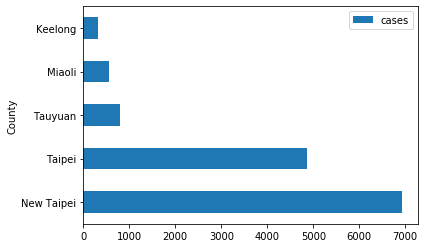

In [9]:
# visualizing the top five counties with the total cases
top_cases = df1.nlargest(5, 'cases')[['County','cases']]
ax = top_cases.plot.barh(x='County', y='cases')
display(top_cases) , ax

Though Taipei city is the capital city of Taiwan, New Taipei city has the highest population in Taiwan. With the high population and heavy commute for poeple from work, it is no surprise that New Taiepi city and Taipei city are the top 2 highest cases in Taiwan.

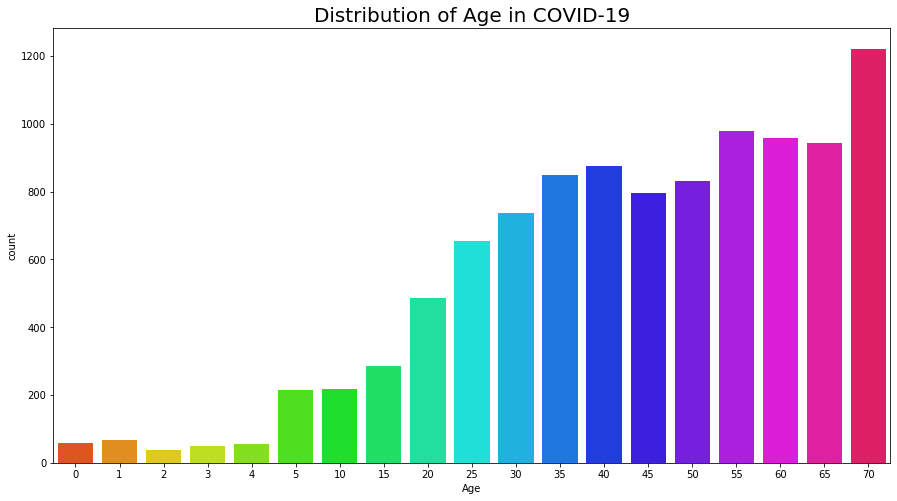

In [10]:
# the distribution of age in the cases
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age in COVID-19', fontsize = 20)
plt.show()

As we can see from the above bar plot, people aged 70 up is the likely group to infected by COVID-19, the reason may be that these people tend to have weaker immune systems than those who are younger. Moreover, the second high group is people aged between 55-60, showing that these people may suffer from lots of pressure in their lives, with the elder and younger to take care of. Thus, they can be much busier than others, implying that they may have less time and money to take care of their health. So, as the pendamic is sweeping the whole world, some of them may still need to leave home for work, easily to get COVID-19 than those who can stay home.

In [11]:
import datetime as dt
import re

# Define function to strip units for object data and convert to year and month

def strip_month(s):
    return re.split('/', s)[1]   

def strip_year(s):
    return re.split('/', s)[0]   

# parse Date column to seperately for Year and Month, to perform visualization based on date after

df['Month'] = df['Date'].apply(strip_month)
df['Year'] = df['Date'].apply(strip_year)



In [12]:
# make a new column with year and month information
case_year_month = df.groupby(['Year','Month'])['cases'].sum().reset_index()
case_year_month['period'] = case_year_month[['Year', 'Month']].agg('-'.join, axis=1)
case_year_month

,Year,Month,cases,period
0,2020,01,2,2020-01
1,2020,02,19,2020-02
2,2020,03,25,2020-03
3,2020,04,9,2020-04
4,2020,12,1,2020-12
5,2021,01,19,2021-01
6,2021,02,2,2021-02
7,2021,04,10,2021-04
8,2021,05,7223,2021-05
9,2021,06,6263,2021-06


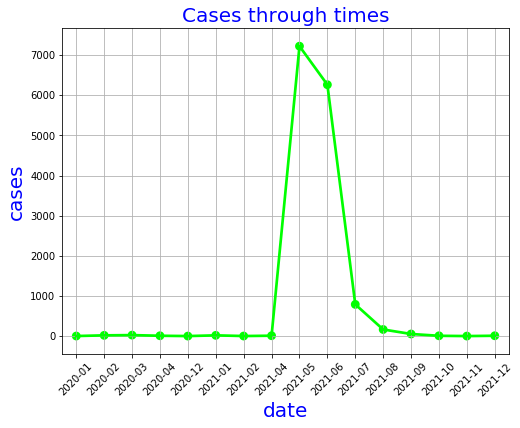

In [13]:
# visualization of confirmed cases changed over differnet period of time
f,ax1 = plt.subplots(figsize =(8,6))
sns.pointplot(x='period',y='cases',data=case_year_month,color='lime',alpha=0.8)
plt.xlabel('date',fontsize = 20,color='blue')
plt.xticks(rotation=45)
plt.ylabel('cases',fontsize = 20,color='blue')
plt.title('Cases through times',fontsize = 20,color='blue')
plt.grid()


We can see from the above visualization, on 2021/5 the cases soared up unpresendently since the COVID-19 started affecting the global life. It's because that maybe Taiwan just get too cocky for their performance in the previvous time, or because the regulation for qurantine for airline crew shorten from 14 days to only 3 days. Also, the UK variants of COVID-19 striked Taiwan at that time. Those reasons sum up, affecting Taiwan a lot and make the situation worse just in a short amount of time. Thus, the lesson I learned from it is that don't ever get too good about ourselves no matter how excellent results we have contributed, there is always another tougher challenges wainting ahead. The only thing can do is to keep learning everyday and make oursleves better than yesterday. It's an old saying but I found it's all time truth.

In [14]:
df.index.name = 'case_no.'
df.reset_index(inplace=True)
df.head()

,case_no.,Diagnosed,Date,County,City,Gender,Foreign,Age,cases,Month,Year
0,6,嚴重特殊傳染性肺炎,2020/01/28,彰化縣,和美鎮,1,否,50,1,01,2020
1,7,嚴重特殊傳染性肺炎,2020/01/30,南投縣,南投市,0,否,40,1,01,2020
2,17,嚴重特殊傳染性肺炎,2020/02/16,彰化縣,彰化市,1,否,55,1,02,2020
3,18,嚴重特殊傳染性肺炎,2020/02/16,彰化縣,彰化市,1,否,60,1,02,2020
4,19,嚴重特殊傳染性肺炎,2020/02/18,Taichung,太平區,1,否,30,1,02,2020


In [15]:
df.columns

Index(['case_no.', 'Diagnosed', 'Date', 'County', 'City', 'Gender', 'Foreign',
       'Age', 'cases', 'Month', 'Year'],
      dtype='object')

In [16]:
# create cluster label for each case

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def create_cluster_df(files, n):
    
    df_cluster = files
    
    # Select feature
    features = ['Age','case_no.']
    x = df_cluster.loc[:, features].values
    
    # fit and normalize the data 
    x = StandardScaler().fit_transform(x) 
    
    # Conduct K-mean
    km = KMeans(n_clusters = n, random_state=0)
    km.fit(x)
    labels = km.labels_
    cluster = labels.tolist()
    
    final_cluster = pd.DataFrame(dict(cluster_label = cluster, title = df_cluster['case_no.']))
    df_new = pd.merge(df_cluster, final_cluster, how = 'left', left_on = ['case_no.'], right_on = ['title'])
    
    return df_new


In [17]:
create_cluster_df(df, 3)

,case_no.,Diagnosed,Date,County,City,Gender,Foreign,Age,cases,Month,Year,cluster_label,title
0,6,嚴重特殊傳染性肺炎,2020/01/28,彰化縣,和美鎮,1,否,50,1,01,2020,1,6
1,7,嚴重特殊傳染性肺炎,2020/01/30,南投縣,南投市,0,否,40,1,01,2020,1,7
2,17,嚴重特殊傳染性肺炎,2020/02/16,彰化縣,彰化市,1,否,55,1,02,2020,1,17
3,18,嚴重特殊傳染性肺炎,2020/02/16,彰化縣,彰化市,1,否,60,1,02,2020,1,18
4,19,嚴重特殊傳染性肺炎,2020/02/18,Taichung,太平區,1,否,30,1,02,2020,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10312,12017,嚴重特殊傳染性肺炎,2021/12/13,宜蘭縣,五結鄉,0,否,35,1,12,2021,2,12017
10313,12025,嚴重特殊傳染性肺炎,2021/12/13,Tauyuan,八德區,1,否,55,1,12,2021,2,12025
10314,12026,嚴重特殊傳染性肺炎,2021/12/13,New Taipei,板橋區,0,否,50,1,12,2021,2,12026
10315,12031,嚴重特殊傳染性肺炎,2021/12/14,Tauyuan,觀音區,1,否,25,1,12,2021,0,12031


In [18]:
# see information within each cluster label
def cluster_df_desc(files, n):
    # create dataframe with cluster label
    df_new = create_cluster_df(files, n)
    
    # summarize the clustered dataframe
    col = ['cluster_label','Age','case_no.','County']
    final_df = df_new[col].groupby(['cluster_label']).agg({
        'cluster_label' : 'size', 
        'case_no.': lambda x:x.value_counts().sum(), 
        'Age': lambda x: x.mean(),
        'County': lambda x: x.value_counts().index[0]
        })
    return display(final_df)

In [19]:
cluster_df_desc(df, 3)

,cluster_label,case_no.,Age,County
cluster_label,,,,
0,3197,3197,22.000626,New Taipei
1,3822,3822,53.411826,New Taipei
2,3298,3298,55.192541,New Taipei


In [20]:
cluster_df_desc(df,5)

,cluster_label,case_no.,Age,County
cluster_label,,,,
0,2016,2016,39.181548,New Taipei
1,2895,2895,58.481865,New Taipei
2,1980,1980,27.394444,New Taipei
3,1262,1262,15.134707,New Taipei
4,2164,2164,62.322089,New Taipei


In [21]:
def pca_vis(files, n):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    df_new = create_cluster_df(files, n)

    
    # Select proper feature
    features = ['Age','case_no.']
    x = df_new.loc[:, features].values
    
    # Normalized data 
    x = StandardScaler().fit_transform(x) 
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    
    principalDf = pd.DataFrame(
        data = principalComponents, columns = ['principal component 1', 'principal component 2']
    )
    
    finalDf = pd.concat([principalDf, df_new[['cluster_label']]], axis = 1)
    
    # plot the PCA two-dimensional graph
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 10)
    ax.set_ylabel('Principal Component 2', fontsize = 10)
    ax.set_title('2-component PCA', fontsize = 15)
    targets = list(range(0,n))
    colors = ['b', 'k', 'r','y','m']
    colors =  colors[:n]

    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['cluster_label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                         , finalDf.loc[indicesToKeep, 'principal component 2']
                         , c = color
                         , s = 50)
    ax.legend(targets)
    ax.grid()
    
    return 'The explained ratio for component 1 is {0:.2f}, and for component 2 is {1:.2f}'. \
                   format(pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1] )

'The explained ratio for component 1 is 0.56, and for component 2 is 0.44'

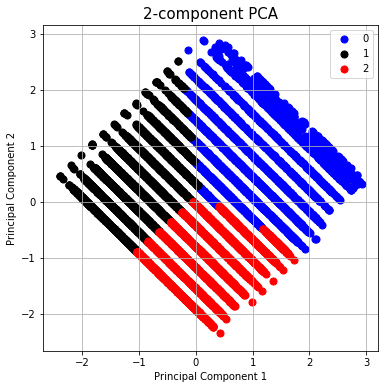

In [22]:
pca_vis(df,3)

'The explained ratio for component 1 is 0.56, and for component 2 is 0.44'

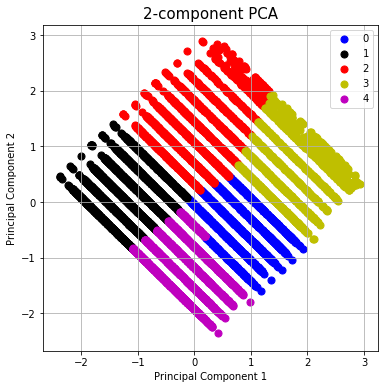

In [23]:
pca_vis(df,5)

As we can see that the above plots showed the total distance among the projected points is notmaximum, meaning that these cases can be distinguished from one another as clearly as possible. Since our goal here is to compare these different groups of cases. If a line blurs data points together, it won’t help.
Therefore, these plots showed a somewhat compact pattern, thus we need to find much more data to analyze it in a more precise way.